In [1]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import sklearn.datasets
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
n_samples = 1500
dataset1 = sklearn.datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
dataset1=pd.DataFrame(dataset1[0])
dataset2 = sklearn.datasets.make_moons(n_samples=n_samples, noise=.05)
dataset2=pd.DataFrame(dataset2[0])
dataset3 = sklearn.datasets.make_blobs(n_samples=n_samples, random_state=8)
dataset3=pd.DataFrame(dataset3[0])
dataset4= np.random.rand(n_samples, 2), None
dataset4=pd.DataFrame(dataset4[0])
dataset5= pd.read_csv("dataset5.csv")
dataset6= pd.read_csv("dataset6.csv")
dataset7= pd.read_csv("dataset7.csv")
dataset8= pd.read_csv("dataset8.csv")
dataset9= pd.read_csv("dataset9.csv")
datasets=[dataset1,dataset2,dataset3,dataset4,dataset5,dataset6,dataset7,dataset8,dataset9]
# z = StandardScaler()
# dataset6[["x","y"]] = z.fit_transform(dataset6)
# sns.scatterplot(data=dataset6,x='x',y='y')

1) plot all dataset 
2) use standard scalar 
3) use K-means, agglomerative, dbscan 
4) plot dataset after clustering 
5) Evaluate inertia,silhouette score,..........

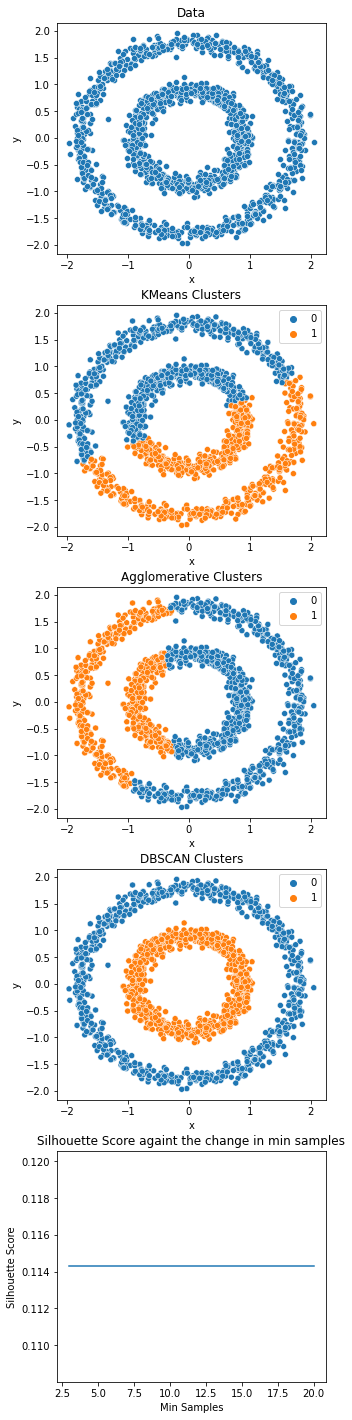

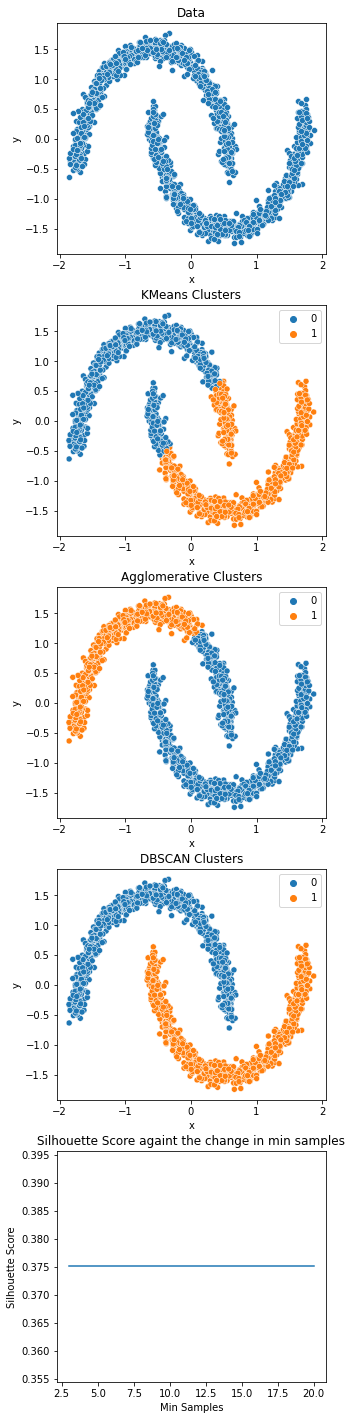

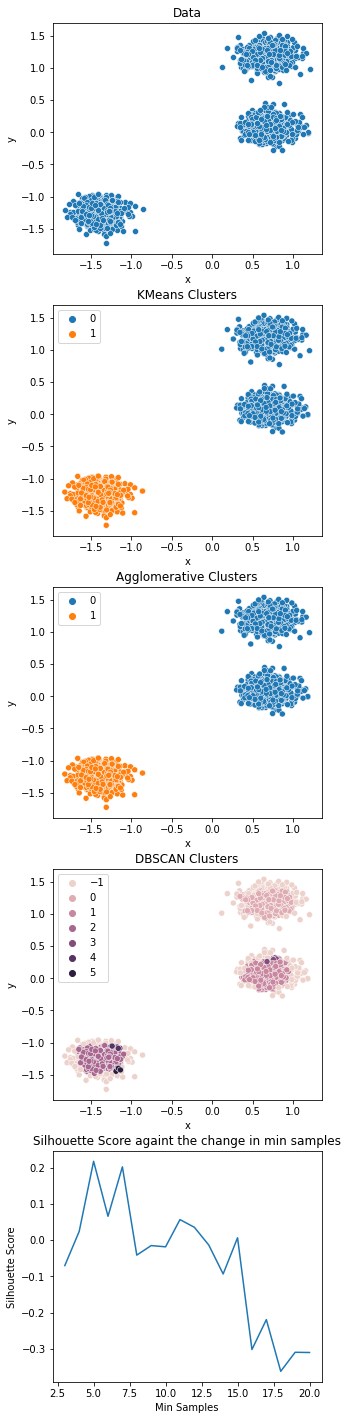

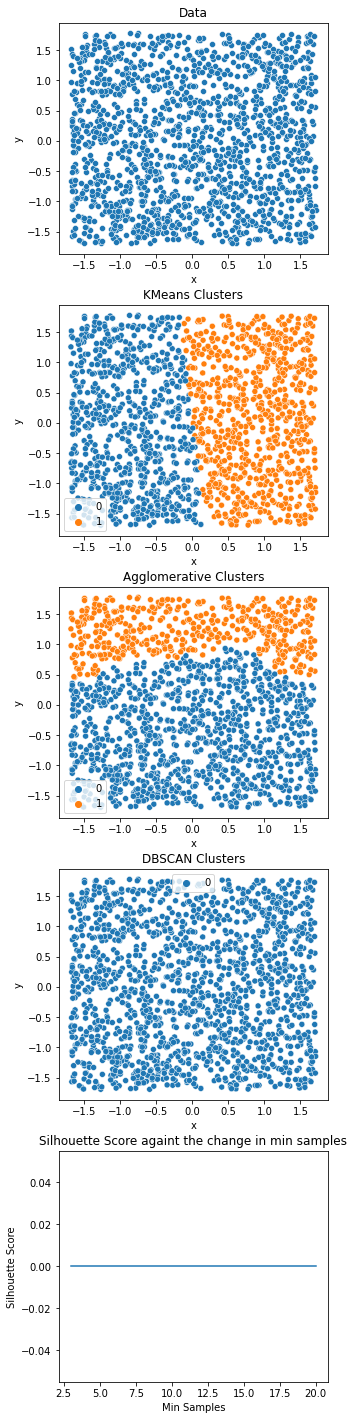

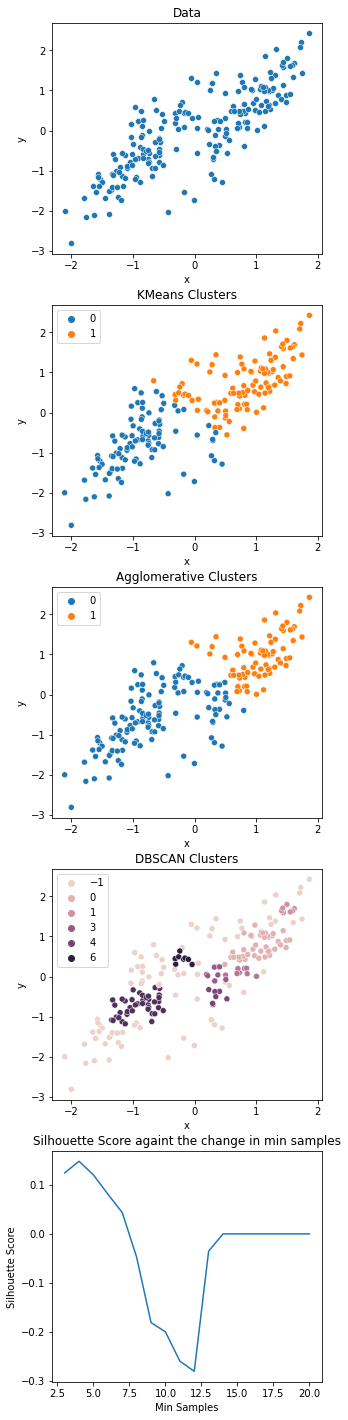

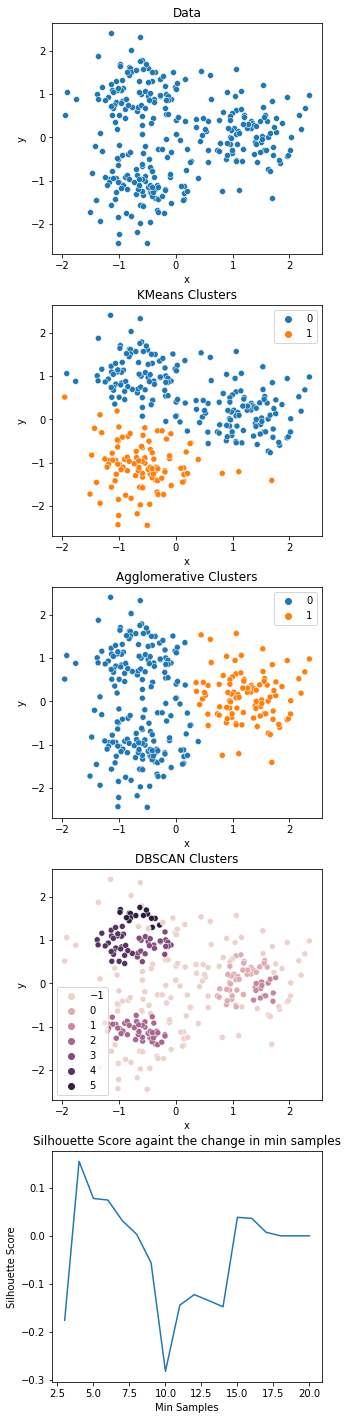

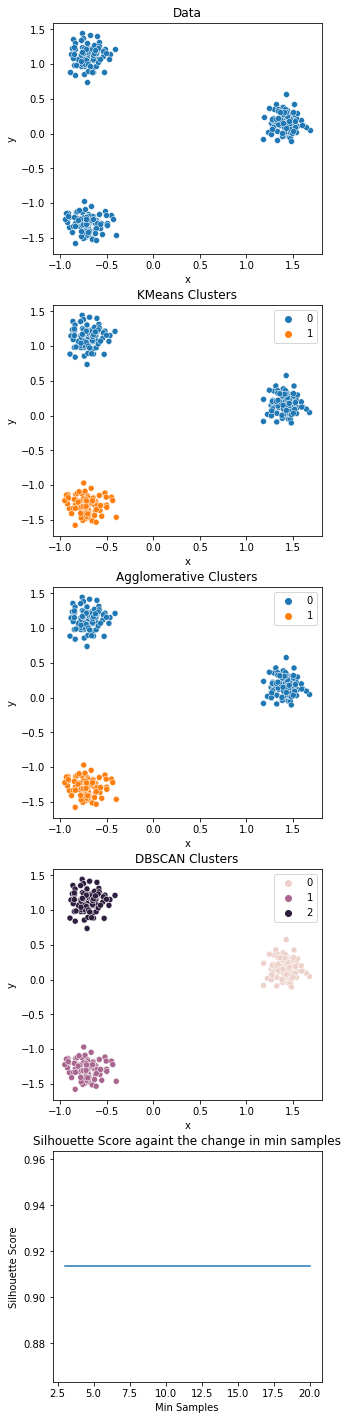

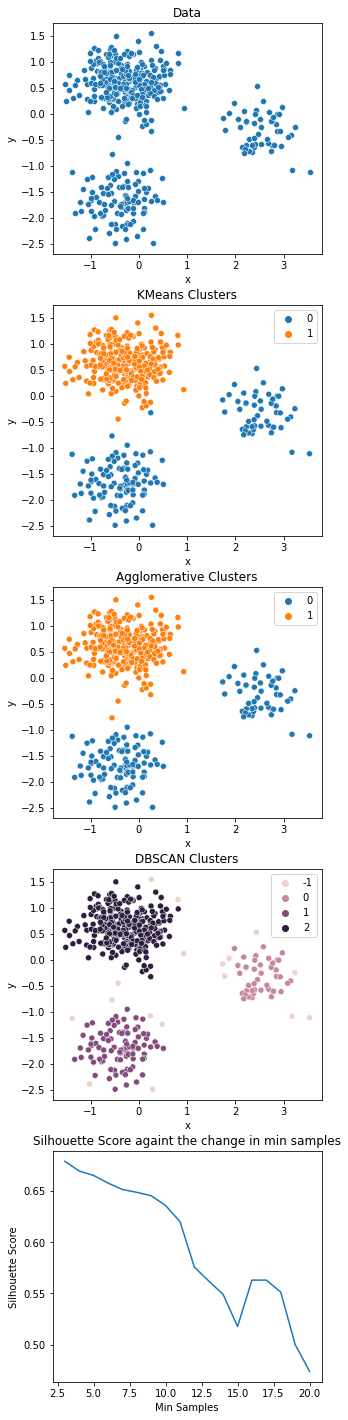

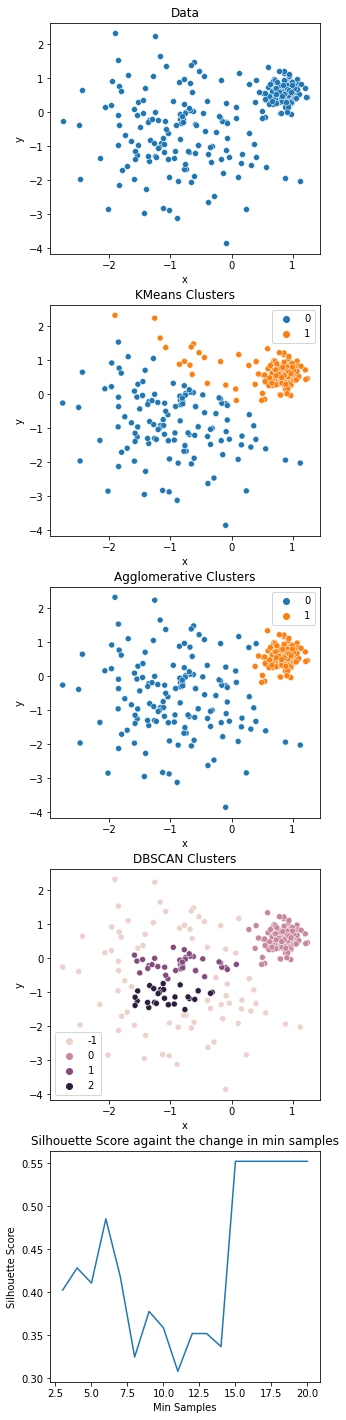

In [3]:
for dataset in datasets:
    fig, ax = plt.subplots(5,figsize=(5,20))
    fig.tight_layout(pad=3.0)
    sc = StandardScaler()
    dataset.shape
    dataset[['x','y']] = sc.fit_transform(dataset)
    ax[0].set_title('Data')
    sns.scatterplot(data=dataset,x='x',y='y',ax=ax[0])
    kmeans = KMeans(n_clusters=2)
    clusters = kmeans.fit_predict(dataset)
    ax[1].set_title('KMeans Clusters')
    sns.scatterplot(data=dataset,x='x',y='y',hue=clusters,ax=ax[1])
    agcluster = AgglomerativeClustering(n_clusters=2)
    clusters = agcluster.fit_predict(dataset)
    ax[2].set_title('Agglomerative Clusters')
    sns.scatterplot(data=dataset,x='x',y='y',hue=clusters,ax=ax[2])
    dbscan = DBSCAN(eps=0.3,min_samples=7)
    clusters = dbscan.fit_predict(dataset)
    ax[3].set_title('DBSCAN Clusters')
    sns.scatterplot(data=dataset,x='x',y='y',hue=clusters,ax=ax[3])
    scores = []
    for i in range(3,21):
        dbscan = DBSCAN(eps=0.3,min_samples=i)
        clusters = dbscan.fit_predict(dataset)
        try :
            scores.append(silhouette_score(dataset,clusters))
        except :
            scores.append(0)
    ax[4].set_title('Silhouette Score againt the change in min samples')
    ax[4].set_xlabel('Min Samples')
    ax[4].set_ylabel('Silhouette Score')
    sns.lineplot(x=range(3,21),y=scores,ax=ax[4])
    plt.show()
    

In [4]:
# For dataset1 :
#     Kmeans and Aggromolative didn't get the right clustring while dbscan did because one cluster is inside the other one.
#     Silhouette Score didn't change with the change of the min samples
    
# For dataset2 :
#     Kmeans and Aggromolative didn't get the right clustring while dbscan did because the clusters are tangled a bit.
#     Silhouette Score didn't change with the change of the min samples
    
# For dataset3 :
#     Kmeans and Aggromolative can be considered to get the right clustring while dbscan didn't because dbscan made too many clusters in a cluster which should be considered one only cluster.
#     Silhouette Score improved when we increased the min samples in range from 5 to 7 then it decreased again
    
# For dataset4 :
#     neither of the clustring algorithms worked well on this data because it is completely random so the clustring wouldn't make any sense here. 
#     Silhouette Score ofcourse is always 0

# For dataset5 :
#     Kmeans and Aggromolative can be considered to get a reasonable clustring while dbscan didn't because dbscan made too many unreasonable clusters . 
#     Silhouette Score increses from 3-4 then it greatly decreases from 5-12 then it become zero till the end.
    
# For dataset6 :
#     Kmeans and Aggromolative can be considered to get a reasonable clustring while dbscan didn't because dbscan made too much outliers. 
#     Silhouette Score increses from 3-4 and from 15-16 and decreases on the rest.    
    
# For dataset7 :
#     Kmeans ,Aggromolative and dbscan made good clustring because the data contains three dense regions with big distances between them. 
#     Silhouette Score didn't change with the change of the min samples.
    
# For dataset8 :
#     Kmeans ,Aggromolative and dbscan made good clustring because the data contains three dense regions with good distances between them. 
#     Silhouette Score decreases while increasing the min sample .    
    
# For dataset9 :
#     Aggromolative is most likely the best on getting the clustring right here while kmeans got a little worse clustring , but dbscan made too much of the data as outliers. 
#     Silhouette Score increses from 3-6 and from 14 till the end then it decreases in the rest of the values.    